In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.preprocessing import image
from tqdm import tqdm
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization, Dropout,LeakyReLU
from tensorflow.keras import callbacks
from sklearn.metrics import f1_score
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('D:/DS/Ship detection/train.csv')
test_data = pd.read_csv('D:/DS/Ship detection/test_ApKoW4T.csv')

In [3]:
print(train_data.head())
print(test_data.head())

         image  category
0  2823080.jpg         1
1  2870024.jpg         1
2  2662125.jpg         2
3  2900420.jpg         3
4  2804883.jpg         2
         image
0  1007700.jpg
1  1011369.jpg
2  1051155.jpg
3  1062001.jpg
4  1069397.jpg


In [4]:
train_data.shape, test_data.shape

((6252, 2), (2680, 1))

In [5]:
train_image = []
for i in tqdm(range(train_data.shape[0])):
    img = image.load_img('D:/DS/Ship detection/images/'+train_data['image'][i],target_size=(100,100,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X=np.array(train_image)
X.shape

100%|██████████████████████████████████████████████████████████████████████████████| 6252/6252 [01:05<00:00, 95.79it/s]


(6252, 100, 100, 3)

In [6]:
test_image = []
for i in tqdm(range(test_data.shape[0])):
    img = image.load_img('D:/DS/Ship detection/images/'+test_data['image'][i],target_size=(100,100,3))
    img = image.img_to_array(img)
    img = img/255
    test_image.append(img)
Xts=np.array(test_image)
Xts.shape

100%|█████████████████████████████████████████████████████████████████████████████| 2680/2680 [00:20<00:00, 132.27it/s]


(2680, 100, 100, 3)

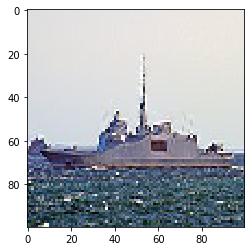

In [7]:
plt.imshow(X[2])

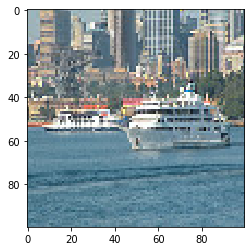

In [8]:
plt.imshow(Xts[2])

In [9]:
train_data['category'][4]

2

In [10]:
y=train_data.category
y=np.array(y)
y

array([1, 1, 2, ..., 5, 3, 1], dtype=int64)

In [23]:
xtr, xv, ytr, yv = train_test_split(X, y, test_size = 0.20, random_state = 0)
print(xtr.shape)
print(ytr.shape)
print(xv.shape)
print(yv.shape)

(5001, 100, 100, 3)
(5001,)
(1251, 100, 100, 3)
(1251,)


In [24]:
checkpoint = ModelCheckpoint('ship_val_acc.h5',monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3),padding='valid',kernel_initializer='he_normal',input_shape=(100,100,3)))
model.add(LeakyReLU(alpha = 0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3, 3),padding='valid',kernel_initializer='he_normal'))
model.add(LeakyReLU(alpha = 0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3, 3),padding='same',kernel_initializer='he_normal'))
model.add(LeakyReLU(alpha = 0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3),padding='same',kernel_initializer='he_normal'))
model.add(LeakyReLU(alpha = 0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3),padding='same',kernel_initializer='he_normal'))
model.add(LeakyReLU(alpha = 0.3))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))



model.add(Flatten())
model.add(Dense(128,kernel_initializer='he_normal'))
model.add(LeakyReLU(alpha = 0.3))
model.add(Dropout(0.25))
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(LeakyReLU(alpha = 0.3))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_normal'))
model.add(LeakyReLU(alpha = 0.3))
model.add(Dropout(0.5))
model.add(Dense(25, activation='softmax',kernel_initializer='glorot_normal'))


model.compile(loss = 'sparse_categorical_crossentropy',
            optimizer = 'adam',
            metrics = ['accuracy'])
history = model.fit(xtr,ytr, epochs=50,batch_size=30,verbose=2,callbacks=[checkpoint],validation_data=(xv,yv))

Train on 5001 samples, validate on 1251 samples
Epoch 1/50

Epoch 00001: val_accuracy improved from -inf to 0.35492, saving model to ship_val_acc.h5
5001/5001 - 12s - loss: 2.8272 - accuracy: 0.1886 - val_loss: 1.9739 - val_accuracy: 0.3549
Epoch 2/50

Epoch 00002: val_accuracy did not improve from 0.35492
5001/5001 - 11s - loss: 1.8654 - accuracy: 0.2649 - val_loss: 1.6932 - val_accuracy: 0.3549
Epoch 3/50

Epoch 00003: val_accuracy improved from 0.35492 to 0.39249, saving model to ship_val_acc.h5
5001/5001 - 11s - loss: 1.7000 - accuracy: 0.2919 - val_loss: 1.5287 - val_accuracy: 0.3925
Epoch 4/50

Epoch 00004: val_accuracy improved from 0.39249 to 0.41247, saving model to ship_val_acc.h5
5001/5001 - 11s - loss: 1.5636 - accuracy: 0.3355 - val_loss: 1.3881 - val_accuracy: 0.4125
Epoch 5/50

Epoch 00005: val_accuracy did not improve from 0.41247
5001/5001 - 11s - loss: 1.4318 - accuracy: 0.3915 - val_loss: 1.2991 - val_accuracy: 0.4085
Epoch 6/50

Epoch 00006: val_accuracy improved fr

Epoch 48/50

Epoch 00048: val_accuracy did not improve from 0.83133
5001/5001 - 11s - loss: 0.3988 - accuracy: 0.8638 - val_loss: 0.5461 - val_accuracy: 0.8217
Epoch 49/50

Epoch 00049: val_accuracy did not improve from 0.83133
5001/5001 - 11s - loss: 0.3652 - accuracy: 0.8724 - val_loss: 0.5690 - val_accuracy: 0.8050
Epoch 50/50

Epoch 00050: val_accuracy improved from 0.83133 to 0.83693, saving model to ship_val_acc.h5
5001/5001 - 11s - loss: 0.3595 - accuracy: 0.8698 - val_loss: 0.5398 - val_accuracy: 0.8369


In [26]:
saved_model = load_model('ship_val_acc.h5')

In [27]:
yp = saved_model.predict_classes(xtr)
print('Train score:',f1_score(ytr, yp, average='macro'))
yvp= saved_model.predict_classes(xv)
print('Val score:', f1_score(yv, yvp, average='macro'))

Train score: 0.9624886096335817
Val score: 0.8414660648682684


In [28]:
t_pred = saved_model.predict_classes(Xts)
t_pred

array([4, 4, 4, ..., 4, 2, 2], dtype=int64)

In [29]:
test_data['category'] = t_pred
test_data.to_csv('ship_sub22.csv', index = False)

In [30]:
test_data.category.value_counts()

1    994
2    508
3    407
5    396
4    375
Name: category, dtype: int64

In [31]:
train_data.category.value_counts()

1    2120
5    1217
2    1167
3     916
4     832
Name: category, dtype: int64

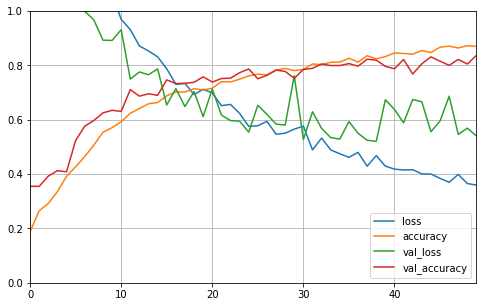

In [32]:
pd.DataFrame(history.history).plot(figsize=(8, 5)) 
plt.grid(True) 
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1] 
plt.show()